<a href="https://colab.research.google.com/github/prashanth-ds-ml/Projects/blob/main/spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/spam.csv',encoding = 'ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape

(5572, 5)

In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace = True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns = {'v1':'Label','v2':'Messsage'}, inplace = True)

In [10]:
df.head()

,Label,Messsage
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
import re

def cleaning_text(text):
  text = re.sub('[^a-zA-Z]', ' ', text)
  text = re.sub('<.*?>','',text)
  text = re.sub('[^\w\d\s]','',text)
  text = re.sub('^\s+|\s+?$','',text)
  return text

In [12]:
clean_messages = df['Messsage'].apply(func=cleaning_text)
clean_messages.head()

0    Go until jurong point  crazy   Available only ...
1                           Ok lar    Joking wif u oni
2    Free entry in   a wkly comp to win FA Cup fina...
3       U dun say so early hor    U c already then say
4    Nah I don t think he goes to usf  he lives aro...
Name: Messsage, dtype: object

In [13]:
labels = df['Label']

In [14]:
labels = pd.get_dummies(labels, columns=['Label'])

In [15]:
labels.drop(['ham'], axis=1,inplace = True)

In [16]:
labels.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [17]:
labels.rename(columns = {'spam':'Label'}, inplace = True)

In [18]:
labels

,Label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(clean_messages, labels, test_size=0.25, random_state=10)

In [20]:
print(f'shape of x_train :{x_train.shape}')
print(f'shape of x_test :{x_test.shape}')
print(f'shape of y_train :{y_train.shape}')
print(f'shape of y_test :{y_test.shape}')

shape of x_train :(4179,)
shape of x_test :(1393,)
shape of y_train :(4179, 1)
shape of y_test :(1393, 1)


In [21]:
y_train = np.squeeze(y_train)

In [22]:
y_test = np.squeeze(y_test)

In [23]:
y_test.head()

4635    0
2279    0
4545    0
5084    0
5298    0
Name: Label, dtype: uint8

In [24]:
print(f'shape of y_train :{y_train.shape}')
print(f'shape of y_test :{y_test.shape}')

shape of y_train :(4179,)
shape of y_test :(1393,)


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [26]:
tokenize = Tokenizer(num_words=10000)

tokenize.fit_on_texts(x_train)

x_train = tokenize.texts_to_sequences(x_train)
x_test = tokenize.texts_to_sequences(x_test)

In [27]:
print(tokenize.word_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'it': 12, 'for': 13, 'your': 14, 'of': 15, 'call': 16, 's': 17, 'have': 18, 'that': 19, 'on': 20, 'are': 21, 'now': 22, 't': 23, 'so': 24, 'can': 25, 'not': 26, 'but': 27, 'm': 28, 'or': 29, 'be': 30, 'do': 31, 'we': 32, 'at': 33, 'will': 34, 'if': 35, 'get': 36, 'with': 37, 'no': 38, 'ur': 39, 'just': 40, 'this': 41, 'how': 42, 'gt': 43, 'lt': 44, 'when': 45, 'up': 46, 'free': 47, 'from': 48, 'what': 49, 'ok': 50, 'all': 51, 'go': 52, 'out': 53, 'know': 54, 'll': 55, 'got': 56, 'come': 57, 'am': 58, 'good': 59, 'like': 60, 'day': 61, 'there': 62, 'then': 63, 'was': 64, 'he': 65, 'time': 66, 'only': 67, 'its': 68, 'love': 69, 'txt': 70, 'p': 71, 'want': 72, 'send': 73, 'as': 74, 'one': 75, 'by': 76, 'home': 77, 'going': 78, 'r': 79, 'text': 80, 'stop': 81, 'need': 82, 'n': 83, 'don': 84, 'k': 85, 'd': 86, 'she': 87, 'lor': 88, 'about': 89, 'today': 90, 'dont': 91, 'still': 92, 'da': 93

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
pad_length = 200

size = len(tokenize.word_index) + 1
print(size)

6714


In [30]:
x_train = pad_sequences(x_train, padding='pre', maxlen=pad_length)
x_test = pad_sequences(x_test, padding='pre', maxlen=pad_length)

print(x_train,'\n')
print(x_test)

[[   0    0    0 ... 3293   29  195]
 [   0    0    0 ...   28   26 1296]
 [   0    0    0 ...    2   39   77]
 ...
 [   0    0    0 ...  967   20 6710]
 [   0    0    0 ...  334  371  169]
 [   0    0    0 ... 6713   76  248]] 

[[   0    0    0 ...   14  299 1158]
 [   0    0    0 ...  107    8  314]
 [   0    0    0 ...    2 1431  737]
 ...
 [   0    0    0 ...  139  461    6]
 [   0    0    0 ...  108    4  260]
 [   0    0    0 ...  800   10   77]]


In [ ]:
#!wget -N http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
#!unzip -n glove.6B.zip

In [31]:
glove_300 = pd.read_csv('glove.6B.300d.txt', sep=" ", quoting=3, header=None, index_col=0)

In [32]:
glove_300.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
the,0.046560,0.213180,-0.007436,-0.458540,-0.035639,0.236430,-0.288360,0.215210,-0.134860,-1.6413,...,-0.013064,-0.296860,-0.079913,0.195000,0.031549,0.285060,-0.087461,0.009061,-0.209890,0.053913
",",-0.255390,-0.257230,0.131690,-0.042688,0.218170,-0.022702,-0.178540,0.107560,0.058936,-1.3854,...,0.075968,-0.014359,-0.073794,0.221760,0.146520,0.566860,0.053307,-0.232900,-0.122260,0.354990
.,-0.125590,0.013630,0.103060,-0.101230,0.098128,0.136270,-0.107210,0.236970,0.328700,-1.6785,...,0.060148,-0.156190,-0.119490,0.234450,0.081367,0.246180,-0.152420,-0.342240,-0.022394,0.136840
of,-0.076947,-0.021211,0.212710,-0.722320,-0.139880,-0.122340,-0.175210,0.121370,-0.070866,-1.5721,...,-0.366730,-0.386030,0.302900,0.015747,0.340360,0.478410,0.068617,0.183510,-0.291830,-0.046533
to,-0.257560,-0.057132,-0.671900,-0.380820,-0.364210,-0.082155,-0.010955,-0.082047,0.460560,-1.8477,...,-0.012806,-0.597070,0.317340,-0.252670,0.543840,0.063007,-0.049795,-0.160430,0.046744,-0.070621


In [33]:
print(glove_300.index.values.take(list(range(0, 100, 10))))
print(glove_300.index.values[:10])

['the' 'for' 'it' 'be' 'had' 'new' 'up' "n't" '$' 'president']
['the' ',' '.' 'of' 'to' 'and' 'in' 'a' '"' "'s"]


In [34]:
embeddings_dictionary = {key: val.values for key, val in glove_300.T.items()}

In [35]:
embeddings_dictionary['president']

array([ 4.3665e-01,  1.8793e-01, -1.7022e-01, -1.0869e-01,  1.9476e-01,
       -2.4502e-01, -7.7660e-01, -2.5813e-01,  4.3630e-01, -2.0884e+00,
       -9.6794e-03,  1.4941e-01,  7.2166e-02, -6.5154e-01, -3.0189e-01,
        8.5747e-01, -3.1906e-02, -4.5204e-01,  8.4932e-02, -4.1816e-01,
        2.6820e-01, -4.5985e-02,  8.0586e-01, -1.3507e-01, -4.7616e-01,
        1.4891e-01,  2.3255e-01,  3.2640e-01,  2.1525e-01, -4.9949e-01,
        4.6968e-01,  1.5521e-01,  4.8574e-01,  3.3412e-01, -1.4695e+00,
        6.2657e-02,  1.9865e-01, -2.9627e-01, -3.4174e-02, -3.9326e-01,
        4.5055e-02,  2.7545e-01, -2.3320e-01, -4.9622e-02, -3.3297e-01,
       -4.0912e-01, -2.4932e-01, -3.8237e-01,  8.8357e-02, -3.8397e-01,
       -2.0878e-01,  1.2368e-03,  3.4651e-01,  1.0924e+00,  5.1525e-01,
        2.9204e-01, -2.0349e-01,  4.0670e-01,  7.7727e-01, -7.7313e-02,
       -2.3235e-02,  1.2527e-01,  4.2712e-01, -2.3133e-01,  4.2311e-01,
       -4.6994e-01, -3.7960e-01,  6.0969e-01, -3.7170e-01, -1.31

In [36]:
embeddings_matrix = np.zeros((size, 300))

for word, index in tokenize.word_index.items():
  emb_vector = embeddings_dictionary.get(word)
  if emb_vector is not None:
    embeddings_matrix[index] = emb_vector
     


In [37]:
embeddings_matrix.shape

(6714, 300)

In [38]:
embeddings_matrix[0].shape

(300,)

In [39]:
embeddings_matrix[:5]

array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [-0.13292 ,  0.16985 , -0.1436  , ..., -0.23778 ,  0.14766 ,
         0.62902 ],
       [-0.25756 , -0.057132, -0.6719  , ..., -0.16043 ,  0.046744,
        -0.070621],
       [-0.28427 ,  0.047977, -0.15062 , ..., -0.090071,  0.016922,
         0.29278 ],
       [-0.29712 ,  0.094049, -0.096662, ...,  0.059717, -0.22853 ,
         0.29602 ]])

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = size, output_dim = 300,
                              weights=[embeddings_matrix],input_length=pad_length,
                              trainable=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.8),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(18, activation='tanh'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [50]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          2014200   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 64)                19264     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                      

In [52]:
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_split=0.30
)

Epoch 1/30
23/23 [==============================] - 1s 13ms/step - loss: 0.5843 - accuracy: 0.8485 - val_loss: 0.4523 - val_accuracy: 0.8756
Epoch 2/30
23/23 [==============================] - 0s 5ms/step - loss: 0.4323 - accuracy: 0.8636 - val_loss: 0.3610 - val_accuracy: 0.8756
Epoch 3/30
23/23 [==============================] - 0s 5ms/step - loss: 0.3825 - accuracy: 0.8636 - val_loss: 0.3092 - val_accuracy: 0.8756
Epoch 4/30
23/23 [==============================] - 0s 6ms/step - loss: 0.3403 - accuracy: 0.8636 - val_loss: 0.2567 - val_accuracy: 0.8756
Epoch 5/30
23/23 [==============================] - 0s 5ms/step - loss: 0.2943 - accuracy: 0.8636 - val_loss: 0.2174 - val_accuracy: 0.8756
Epoch 6/30
23/23 [==============================] - 0s 7ms/step - loss: 0.2536 - accuracy: 0.8636 - val_loss: 0.1864 - val_accuracy: 0.8756
Epoch 7/30
23/23 [==============================] - 0s 5ms/step - loss: 0.2260 - accuracy: 0.8701 - val_loss: 0.1654 - val_accuracy: 0.8764
Epoch 8/30
23/23 [=

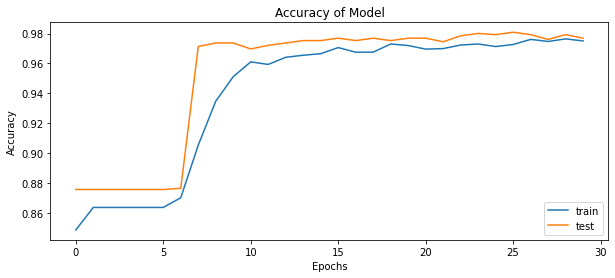

In [53]:
fig = plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

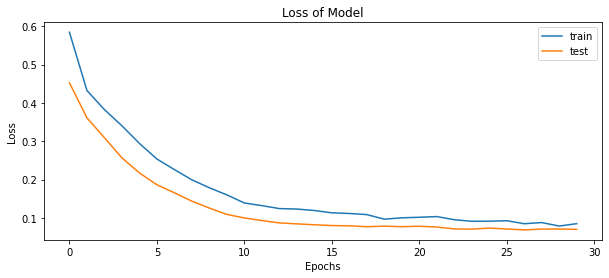

In [54]:
fig = plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
